In [ ]:
!pip3 install praw
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install nltk
!pip3 install gensim

In [5]:
import pandas as pd
import emoji
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str): return " "
    text = text.lower()
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [22]:
# Mining subreddits
import time
import praw
import pandas as pd
import json

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)

with open('./sub_keyword.json', 'r') as file:
    data = json.load(file)
iterations = data['iterations']

subs_df = pd.DataFrame(columns=['display_name', 'name',
                                'description', 'public_description',
                                'subscribers'])


for iteration in iterations:
    suffixes = ['bc', 'ca', 'brithish']
    subs = [sub + suffix for suffix in suffixes for sub in iteration['subreddits']]
    for index, sub in enumerate(subs):
        for subreddit in reddit.subreddits.search_by_name(sub, exact=False, include_nsfw=False):
            new_row = {
                'display_name': subreddit.display_name,
                'name': subreddit.name,
                'description': clean_text(subreddit.description),
                'public_description': clean_text(subreddit.public_description),
                'subscribers': subreddit.subscribers
            }
            subs_df.loc[len(subs_df)] = new_row
        subs_df.to_csv(f'./subs{index}.csv', index=False)
        subs_df.head()


['argentabrithish', 'balfourbrithish', 'barrierebrithish', 'blue riverbrithish', 'boston barbrithish', 'burns lakebrithish', 'cache creekbrithish', 'canal flatsbrithish', 'cassiarbrithish', 'castlegarbrithish', 'cedarbrithish', 'chetwyndbrithish', 'chilanko forksbrithish', 'chilliwackbrithish', 'christina lakebrithish', 'clintonbrithish', 'cranbrookbrithish', 'crawford baybrithish', 'dawson creekbrithish', 'duncanbrithish', 'elkfordbrithish', 'endakobrithish', 'fauquierbrithish', 'ferniebrithish', 'fieldbrithish', 'fort nelsonbrithish', 'fort st. jamesbrithish', 'fort st. johnbrithish', 'fraser lakebrithish', 'gold bridgebrithish', 'goldenbrithish', 'grand forksbrithish', 'hancevillebrithish', 'hedleybrithish', 'highlandsbrithish', 'hillsbrithish', 'hopebrithish', 'horseflybrithish', 'invermerebrithish', 'kamloopsbrithish', 'kaslobrithish', 'kelownabrithish', 'keremeosbrithish', 'kimberleybrithish', 'liard riverbrithish', 'likelybrithish', 'lillooetbrithish', 'lower postbrithish', 'lum

In [29]:
subs_df = pd.read_csv('./subs.csv')
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_0.csv')], ignore_index=True)
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_1.csv')], ignore_index=True)
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_2.csv')], ignore_index=True)
print(len(subs_df))
subs_df = pd.concat([subs_df, pd.read_csv('./subs_3.csv')], ignore_index=True)
print(len(subs_df))

subs_df = subs_df.drop_duplicates(subset=['display_name'])
print(len(subs_df))
subs_df.head()

subs_df.to_csv('./subs_merged.csv', index=False)


174
642
863
907
1082
528


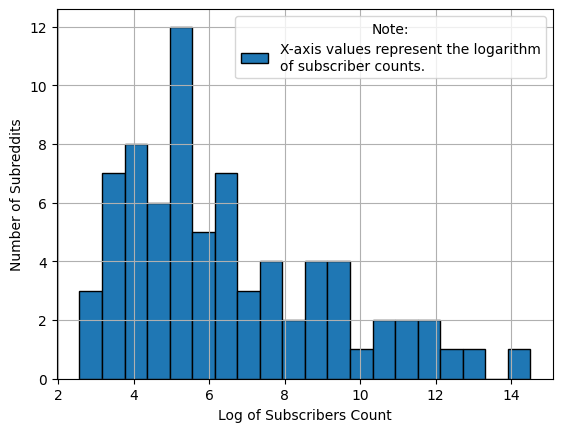

In [46]:
import pandas as pd

subs_df = pd.read_csv('./data/subs_merged copy.csv')
subs_df['subscribers'].fillna(0, inplace=True)
subs_df['subscribers'] = subs_df['subscribers'].astype(int)

# desc = subs_df['subscribers'].describe().astype(int)
# print(desc)

# import matplotlib.pyplot as plt

# subs_df['subscribers'].hist(bins=30, edgecolor='black')
# plt.xlabel('Subscribers Count')
# plt.ylabel('Number of Subreddits')
# plt.title('Distribution of Subscribers Count')
# plt.show()

# subs_df['subscribers'].plot(kind='box')
# plt.ylabel('Subscribers Count')
# plt.title('Box Plot of Subscribers Count')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Create log column
subs_df['log_subscribers'] = np.log(subs_df['subscribers'] + 1)

ax = subs_df['log_subscribers'].hist(bins=20, edgecolor='black')
plt.xlabel('Log of Subscribers Count')
plt.ylabel('Number of Subreddits')

ax.legend(loc="upper right", title="Note:", 
          labels=["X-axis values represent the logarithm\nof subscriber counts."])

plt.show()

In [2]:
# Mining data from Reddit
import time
import praw
import pandas as pd
import json

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)


params = {'sort': 'new', 'limit': None, 'time_filter': 'all'}

columns = ['author', 'author_flair_text', 'created_utc', 'distiguished', 'edited', 'id', 'is_original_content', 'is_self',
           'name', 'num_comments', 'over_18', 'permalink', 'score', 'selftext', 'subreddit', 'title', 'upvote_ratio', 'url']

with open('./sub_keyword.json', 'r') as file:
    data = json.load(file)
iterations = data['iterations']

for iteration in iterations:
    for subreddit in iteration['subreddits']:
        df = pd.DataFrame(columns=columns)
        for keyword in iteration['keywords']:
            start_time = time.time()
            print('start_time: ' + str(start_time))
            print('\tsubreddit: ' + subreddit + ', keyword: ' + keyword)
            for submission in reddit.subreddit(subreddit).search(keyword, **params):
                new_row = {
                    'author': submission.author.name,
                    'author_flair_text': submission.author_flair_text,
                    'created_utc': int(submission.created_utc),
                    'distiguished': submission.distinguished,
                    'edited': submission.edited,
                    'id': submission.id,
                    'is_original_content': submission.is_original_content,
                    'is_self': submission.is_self,
                    'name': submission.name,
                    'num_comments': submission.num_comments,
                    'over_18': submission.over_18,
                    'permalink': submission.permalink,
                    'score': submission.score,
                    'selftext': submission.selftext,
                    'subreddit': submission.subreddit.display_name,
                    'title': submission.title,
                    'upvote_ratio': submission.upvote_ratio,
                    'url': submission.url
                }
                df.loc[len(df)] = new_row
            # time.sleep(max(0, 10 - time.time() + start_time))

        df = df.drop_duplicates(subset='id', keep='first')
        df.to_csv(f'./data_{subreddit}.csv', index=False)

Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


In [4]:
all_files = ['./data_' + subreddit + '.csv' for subreddit in iterations[0]['subreddits']]
df = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)
df = df.drop_duplicates(subset='id', keep='first')
df.to_csv('./data.csv', index=False)
len(df)

6884

In [48]:
# Pre-processing data
import pandas as pd

input_file_name = "data.csv"
output_file_name = "reddit_clean.csv"

reddit_data = pd.read_csv(input_file_name)

selected_data = reddit_data.copy()
selected_data['title'] = selected_data['title'].apply(clean_text)
selected_data['selftext'] = selected_data['selftext'].apply(clean_text)
selected_data['permalink'] = 'https://www.reddit.com' + selected_data['permalink']

selected_data.to_csv(output_file_name, index=False)

NameError: name 'clean_text' is not defined

In [49]:
# Filter Self-Post
input_file_name = "reddit_clean.csv"
reddit_data = pd.read_csv(input_file_name)
selected_data = reddit_data.copy()
print(selected_data.shape)
selected_data = selected_data[selected_data['is_self']]
print(selected_data.shape)

# Filter Discussion Post (num_comments > 0)
selected_data = selected_data[selected_data['num_comments'] > 0]
print(selected_data.shape)

# Filter Score and Upvote Ratio
selected_data = selected_data[selected_data['upvote_ratio'].notna()]
selected_data = selected_data[selected_data['score'] > 1]
selected_data['upvote_ratio'].describe()
print(selected_data.shape)

(6884, 18)
(3307, 18)
(3196, 18)
(2355, 18)


Mean (log scale): 2.828499961220345
Median (log scale): 2.70805020110221
Standard Deviation (log scale): 1.1691239029825897
Minimum (log scale): 0.6931471805599453
Maximum (log scale): 9.179674957665297


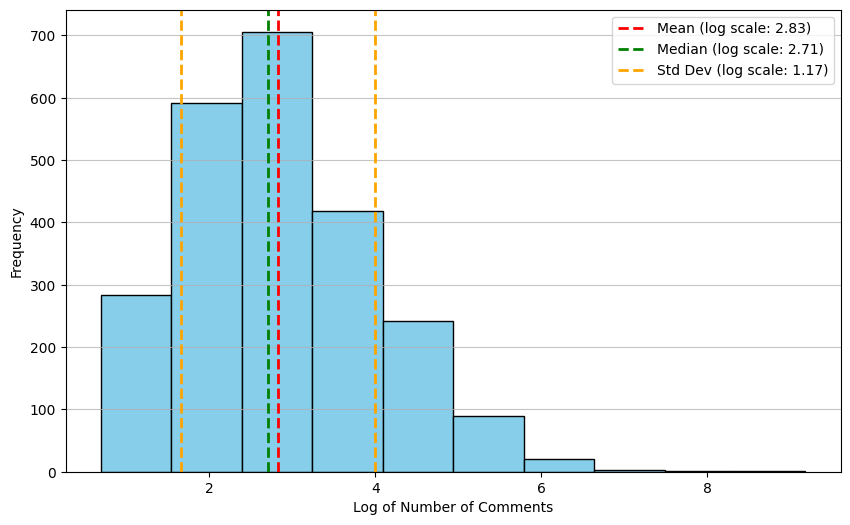

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Taking log of the data
selected_data['log_num_comments'] = np.log1p(selected_data['num_comments'])

mean_value = np.mean(selected_data['log_num_comments'])
median_value = np.median(selected_data['log_num_comments'])
std_deviation = np.std(selected_data['log_num_comments'])
min_value = np.min(selected_data['log_num_comments'])
max_value = np.max(selected_data['log_num_comments'])

print("Mean (log scale):", mean_value)
print("Median (log scale):", median_value)
print("Standard Deviation (log scale):", std_deviation)
print("Minimum (log scale):", min_value)
print("Maximum (log scale):", max_value)

plt.figure(figsize=(10, 6))
plt.hist(selected_data['log_num_comments'], color='skyblue', edgecolor='black')
plt.xlabel('Log of Number of Comments')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean (log scale: {mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median (log scale: {median_value:.2f})')
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=2, label=f'Std Dev (log scale: {std_deviation:.2f})')
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Mean: 0.8039023354564756
Median: 0.82
Standard Deviation: 0.1322197192400001
Minimum: 0.51
Maximum: 1.0


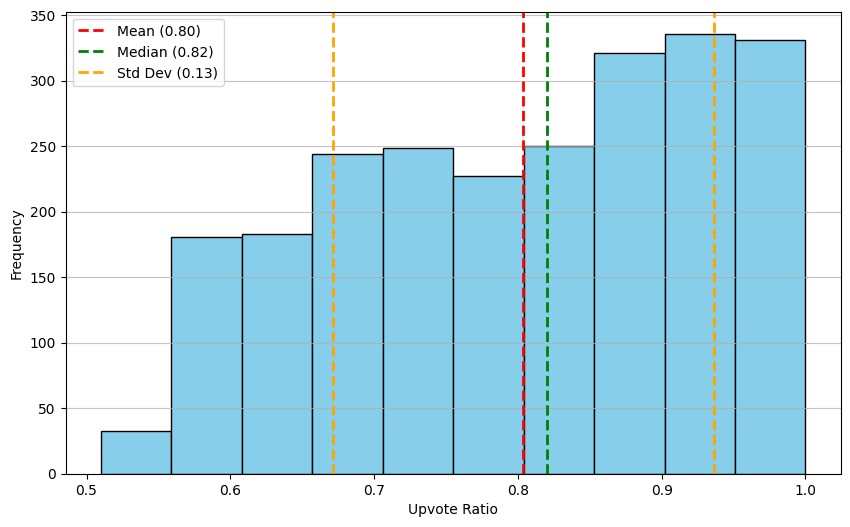

In [52]:
# Number of upvotes analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

attribute_name = 'upvote_ratio'

mean_value = np.mean(selected_data[attribute_name])
median_value = np.median(selected_data[attribute_name])
std_deviation = np.std(selected_data[attribute_name])
min_value = np.min(selected_data[attribute_name])
max_value = np.max(selected_data[attribute_name])

print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Minimum:", min_value)
print("Maximum:", max_value)



plt.figure(figsize=(10, 6))
plt.hist(selected_data[attribute_name], color='skyblue', edgecolor='black')
plt.xlabel('Upvote Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median ({median_value})')
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=2, label=f'Std Dev ({std_deviation:.2f})')
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

In [10]:
selected_data.head()

,author,author_flair_text,created_utc,distiguished,edited,id,is_original_content,is_self,name,num_comments,over_18,permalink,score,selftext,subreddit,title,upvote_ratio,url
0,Ghosthands77,NaN,1677543402,NaN,False,11drhhe,False,True,t3_11drhhe,7,False,https://www.reddit.com/r/FortStJohn/comments/1...,7,,FortStJohn,hey guys/gals! i heard that the bottle depot w...,1.0,https://www.reddit.com/r/FortStJohn/comments/1...
1,EmeraldLight,NaN,1673322558,NaN,False,107znsf,False,True,t3_107znsf,4,False,https://www.reddit.com/r/FortStJohn/comments/1...,5,"i can't see it from my place, but i've seen fi...",FortStJohn,anyone witnessing the peace counter trailer pa...,1.0,https://www.reddit.com/r/FortStJohn/comments/1...
7,EmeraldLight,NaN,1502630123,NaN,False,6tf1m5,False,True,t3_6tf1m5,9,False,https://www.reddit.com/r/FortStJohn/comments/6...,5,literally it's so strong that it made me sprin...,FortStJohn,holy smoke batman...,1.0,https://www.reddit.com/r/FortStJohn/comments/6...
12,AwakenFiend,NaN,1502369481,NaN,1502427733.0,6st37r,False,True,t3_6st37r,3,False,https://www.reddit.com/r/FortStJohn/comments/6...,2,"just moved here from inuvik, nwt (had a very s...",FortStJohn,aurora borealis in fort st john?,1.0,https://www.reddit.com/r/FortStJohn/comments/6...
13,realSequence,NaN,1541793968,NaN,False,9vns4h,False,True,t3_9vns4h,2,False,https://www.reddit.com/r/GrandForks/comments/9...,3,i'm coming from winnipeg with my gf to drop of...,GrandForks,downtown ice rink and things to do,1.0,https://www.reddit.com/r/GrandForks/comments/9...


In [11]:

df['created_utc_clean'] = df['created_utc'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df['created_utc_clean'].head()
df['created_utc_clean'].tail()

6879    2023-04-04 16:09:04
6880    2020-08-02 13:00:06
6881    2019-11-18 07:11:03
6882    2019-05-01 15:53:38
6883    2021-04-25 15:42:55
Name: created_utc_clean, dtype: object

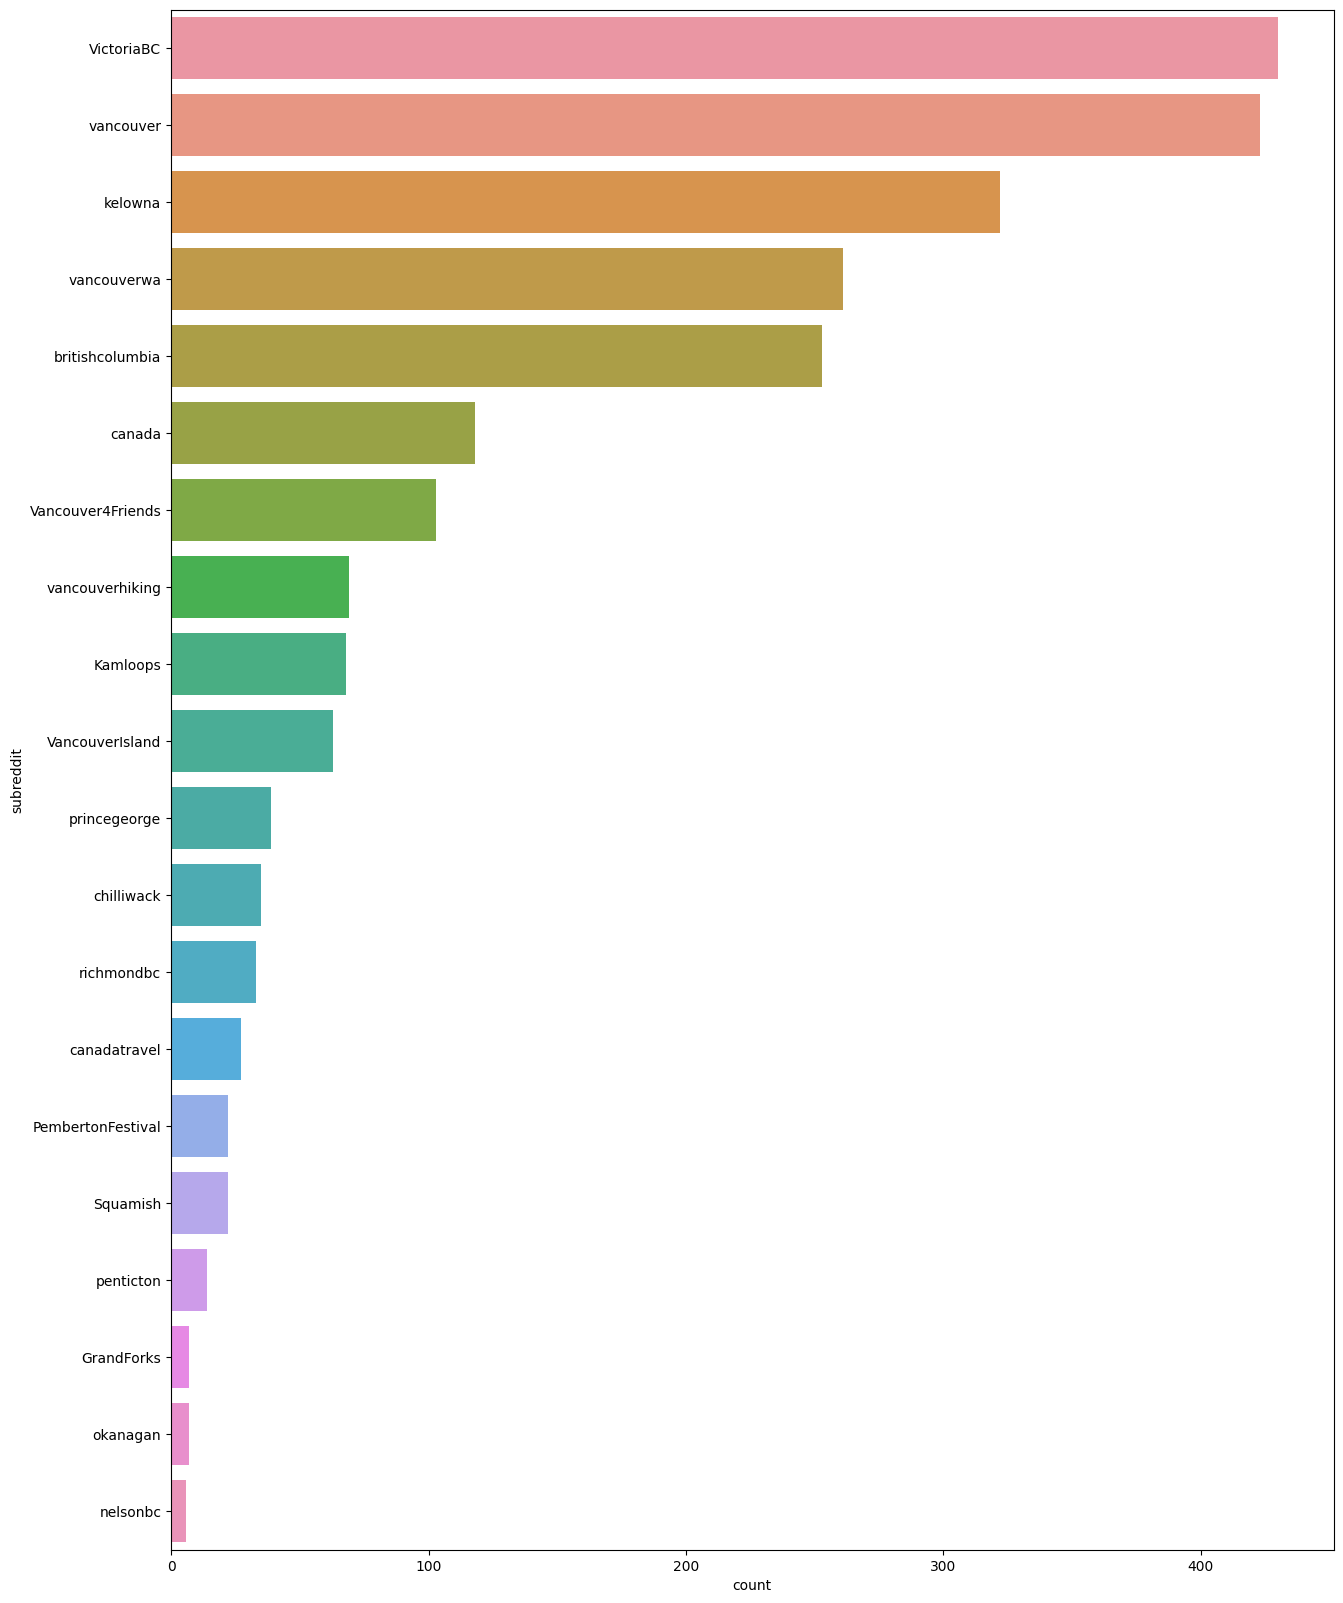

In [12]:
# create a fig with most frequent subreddits
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 20))
subreddit_count = selected_data['subreddit'].value_counts()
sns.countplot(y="subreddit", data=selected_data, order=subreddit_count.iloc[:20].index, ax=ax)
plt.show()

/usr/lib/python3/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


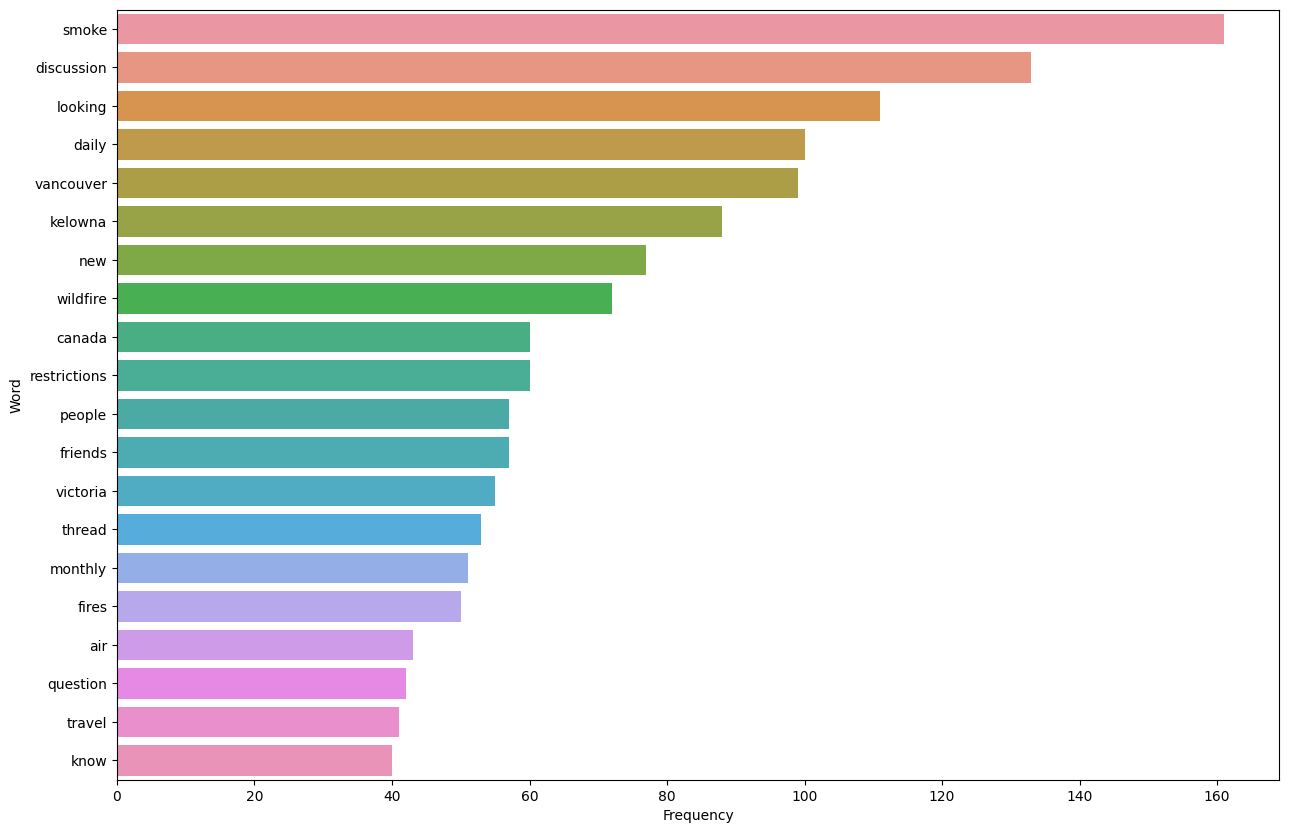

In [13]:
# create a fig with most keywords in titles
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS

fig, ax = plt.subplots(figsize=(15, 10))
all_titles = ' '.join(selected_data['title'].tolist())
all_titles = all_titles.lower()
words = [word for word in word_tokenize(all_titles) if
         len(word) > 2 and word not in STOPWORDS and word.isalpha()]
word_counts = Counter(words)
word_counts_df = pd.DataFrame(
    word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

sns.barplot(x="Frequency", y="Word", data=word_counts_df.iloc[:20], ax=ax)
plt.show()


0     2023-02-28
1     2023-01-10
7     2017-08-13
12    2017-08-10
13    2018-11-09
Name: created_utc, dtype: object
created_utc
2023-08-19    48
2023-08-18    38
2023-08-20    34
2023-08-21    22
2023-08-22    11
              ..
2023-09-25     2
2022-05-31     2
2023-05-13     2
2022-11-23     2
2023-09-14     2
Name: count, Length: 497, dtype: int64


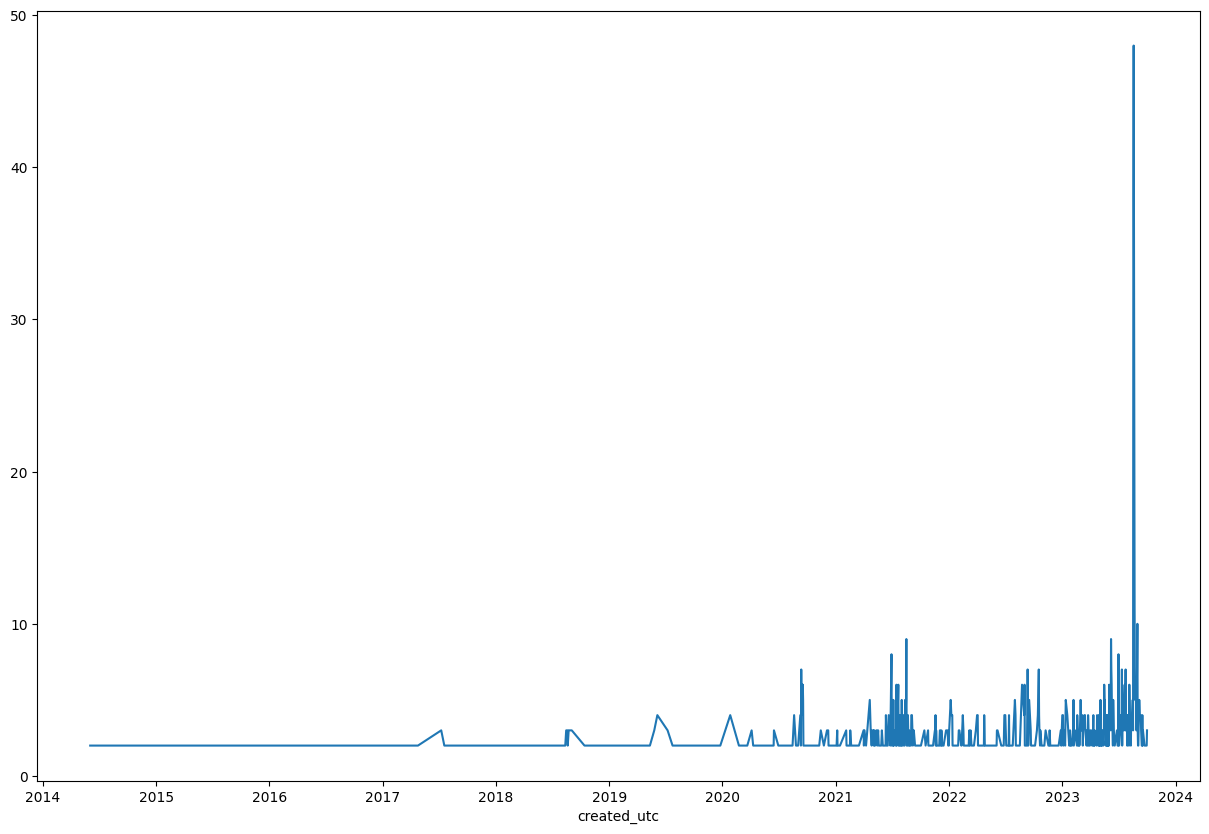

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

selected_data_copy = selected_data.copy()
selected_data_copy['created_utc'] = selected_data_copy['created_utc'].apply(lambda x: pd.to_datetime(x, unit='s'))

daily_counts = selected_data_copy['created_utc'].dt.date
print(daily_counts.head())
daily_counts = daily_counts.value_counts()
daily_counts = daily_counts[daily_counts > 1]
print(daily_counts)

fig, ax = plt.subplots(figsize=(15, 10))
daily_counts.plot(ax=ax)
plt.show()

In [15]:
selected_data.to_csv('reddit_filter.csv', index=False)